In [187]:
import sys
!{sys.executable} -m pip install nltk --user

    100% |████████████████████████████████| 1.4MB 1.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jia/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Case1: using features from Spark (TF-IDF-Cosine similarity)

In [1]:
import pandas as pd

In [2]:
test = pd.read_csv("/home/yiwei/yiwei_data/test_filled_simi0919.csv", index_col=0)

In [3]:
# reverse the column names between 'idGit' and 'idLink' 
test.columns.values[1] = 'temp'

test.columns.values[0]= 'idLink'

test.columns.values[1] = 'idGit'

In [4]:
test.head()

,idLink,idGit,label,bio_simi,edu_exp_simi,gitlang_simi,pro_pub_title_simi,pro_pub_desc_simi,skill_simi,summary_simi,...,login_fuzz,login_jw,location_fuzz_sort,school_company,company_company,linkedin_gitblog,linkedin_gitweb,linkweb_gitblog,linkweb_gitweb,linkweb_github
0,100012,g2899552,0.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,...,78.0,0.73623,34.0,0.0,0.0,0.670411,0.670411,0.506531,0.506531,0.584223
1,100061,g4882851,0.0,-1.0,-1.0,0.000000,-1.0,0.0,0.000000,-1.0,...,63.0,0.78846,34.0,28.0,38.0,0.717949,0.717949,0.666667,0.666667,0.594595
2,10007,g571263,0.0,-1.0,-1.0,-1.000000,-1.0,-1.0,0.000000,-1.0,...,67.0,0.71520,33.0,0.0,0.0,0.670411,0.670411,0.506531,0.506531,0.584223
3,100138,g182785,0.0,0.0,0.0,0.085641,-1.0,-1.0,0.035948,-1.0,...,57.0,0.80000,23.0,0.0,0.0,0.670411,0.670411,0.506531,0.506531,0.608696
4,100138,g3326748,0.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,...,47.0,0.57619,39.0,0.0,0.0,0.670411,0.670411,0.506531,0.506531,0.576923


In [5]:
train = pd.read_csv("/home/yiwei/yiwei_data/train_filled_simi0919.csv", index_col=0)

In [6]:
# reverse the column names between 'idGit' and 'idLink' 
train.columns.values[1] = 'temp'

train.columns.values[0]= 'idLink'

train.columns.values[1] = 'idGit'

In [7]:
train.head()

,idLink,idGit,label,bio_simi,edu_exp_simi,gitlang_simi,pro_pub_title_simi,pro_pub_desc_simi,skill_simi,summary_simi,...,login_fuzz,login_jw,location_fuzz_sort,school_company,company_company,linkedin_gitblog,linkedin_gitweb,linkweb_gitblog,linkweb_gitweb,linkweb_github
0,100138,g100500,0.0,0.024105,0.000000,0.047227,-1.0,-1.0,0.052718,-1.0,...,69.0,0.89250,38.0,0.0,0.0,0.714286,0.714286,0.520000,0.520000,0.685714
1,100138,g1019498,0.0,-1.000000,-1.000000,0.067849,-1.0,-1.0,0.056572,-1.0,...,33.0,0.55000,36.0,0.0,0.0,0.670411,0.670411,0.506531,0.506531,0.666667
2,100138,g103700,0.0,-1.000000,-1.000000,0.124147,-1.0,-1.0,0.022928,-1.0,...,78.0,0.85833,38.0,22.0,11.0,0.742857,0.742857,0.473684,0.473684,0.666667
3,100138,g111705,0.0,0.017670,0.023765,0.037297,-1.0,-1.0,0.028783,-1.0,...,21.0,0.45351,32.0,14.0,18.0,0.685714,0.685714,0.647059,0.647059,0.710526
4,100138,g1181508,0.0,-1.000000,-1.000000,0.132874,-1.0,-1.0,0.054940,-1.0,...,82.0,0.93000,32.0,27.0,28.0,0.685714,0.685714,0.434783,0.434783,0.645161


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491790 entries, 0 to 491789
Data columns (total 26 columns):
idLink                491790 non-null int64
idGit                 491790 non-null object
label                 491790 non-null float64
bio_simi              491790 non-null float64
edu_exp_simi          491790 non-null float64
gitlang_simi          491790 non-null float64
pro_pub_title_simi    491790 non-null float64
pro_pub_desc_simi     491790 non-null float64
skill_simi            491790 non-null float64
summary_simi          491790 non-null float64
exp_desc_simi         491790 non-null float64
count                 491790 non-null float64
name_leven            491790 non-null float64
name_dmetaphone       491790 non-null float64
name_jw               491790 non-null float64
name_fuzz             491790 non-null float64
login_fuzz            491790 non-null float64
login_jw              491790 non-null float64
location_fuzz_sort    491790 non-null float64
school_company    

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210275 entries, 0 to 210274
Data columns (total 26 columns):
idLink                210275 non-null int64
idGit                 210275 non-null object
label                 210275 non-null float64
bio_simi              210275 non-null float64
edu_exp_simi          210275 non-null float64
gitlang_simi          210275 non-null float64
pro_pub_title_simi    210275 non-null float64
pro_pub_desc_simi     210275 non-null float64
skill_simi            210275 non-null float64
summary_simi          210275 non-null float64
exp_desc_simi         210275 non-null float64
count                 210275 non-null float64
name_leven            210275 non-null float64
name_dmetaphone       210275 non-null float64
name_jw               210275 non-null float64
name_fuzz             210275 non-null float64
login_fuzz            210275 non-null float64
login_jw              210275 non-null float64
location_fuzz_sort    210275 non-null float64
school_company    

In [10]:
train.label = train.label.astype('category')

In [11]:
test.label = test.label.astype('category')

In [12]:
trainingID = train.loc[:,'idLink':'idGit']

In [13]:
testID = test.loc[:,'idLink':'idGit']

In [13]:
train.iloc[:,3:].describe(percentiles=[.25,.5,.75,.95])

,bio_simi,edu_exp_simi,gitlang_simi,pro_pub_title_simi,pro_pub_desc_simi,skill_simi,summary_simi,exp_desc_simi,count,name_leven,...,login_fuzz,login_jw,location_fuzz_sort,school_company,company_company,linkedin_gitblog,linkedin_gitweb,linkweb_gitblog,linkweb_gitweb,linkweb_github
count,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,...,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000,491790.000000
mean,-0.767356,-0.767254,-0.364898,-0.901849,-0.760087,-0.293994,-0.968422,-0.479048,69.950772,4.462557,...,49.529710,0.638823,34.193662,8.169168,13.029580,0.670403,0.670403,0.506536,0.506536,0.584118
std,0.431574,0.425737,0.501327,0.298596,0.434177,0.470381,0.177500,0.509712,88.838188,5.452825,...,22.281679,0.215013,12.910034,15.120508,23.791707,0.079836,0.079836,0.095006,0.095006,0.103853
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,9.000000,0.000000,...,33.000000,0.490480,29.000000,0.000000,0.000000,0.670411,0.670411,0.506531,0.506531,0.584223
50%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,35.000000,3.000000,...,48.000000,0.626070,34.000000,0.000000,0.000000,0.670411,0.670411,0.506531,0.506531,0.584223
75%,-1.000000,-1.000000,0.020874,-1.000000,-1.000000,0.011176,-1.000000,0.007189,91.000000,8.000000,...,64.000000,0.829640,34.000000,15.000000,26.000000,0.670411,0.670411,0.506531,0.506531,0.615385
95%,0.000000,0.000000,0.091899,0.000000,0.025832,0.066922,-1.000000,0.046452,278.000000,15.000000,...,91.000000,0.963640,64.000000,38.000000,58.000000,0.795455,0.795455,0.631579,0.631579,0.714286
max,1.000000,0.895711,0.997116,1.000000,0.847171,0.859858,0.844114,0.831315,487.000000,243.000000,...,100.000000,1.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,0.910638


In [14]:
import matplotlib.pyplot as plt

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80078cb518>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80078a16a0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80078539b0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f800787cd30>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8007827eb8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80077da0f0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8007804400>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80077af710>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f800775b9e8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8007707ba8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8007731dd8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80076e2198>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f800768d4a8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80076b9550>]]
[[<matplotlib.axes._subplots.AxesS

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


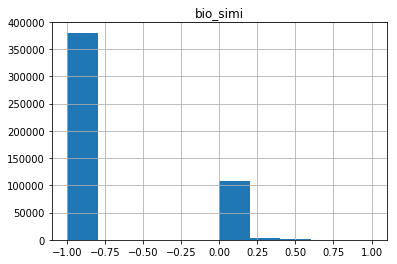

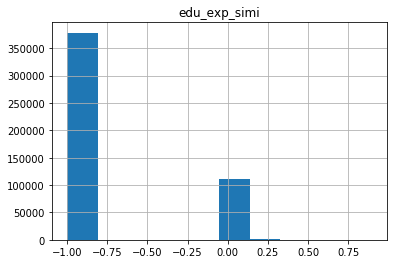

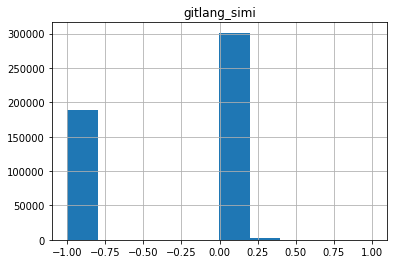

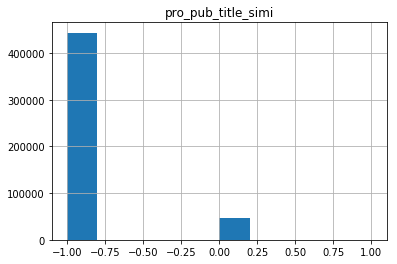

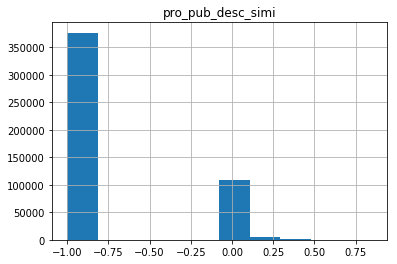

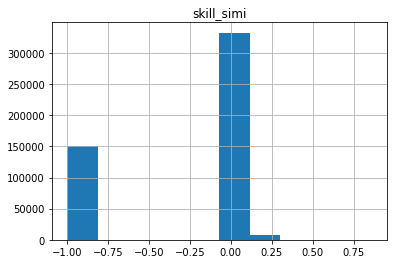

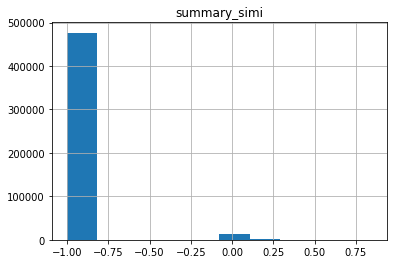

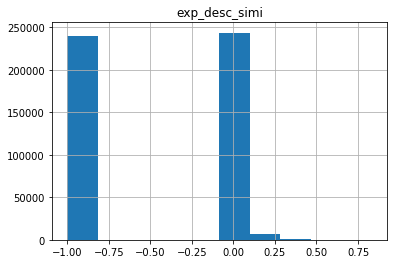

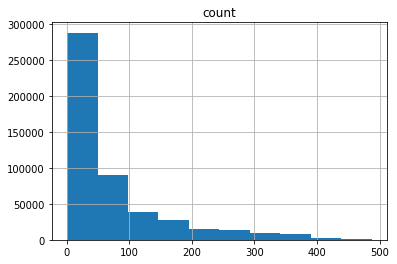

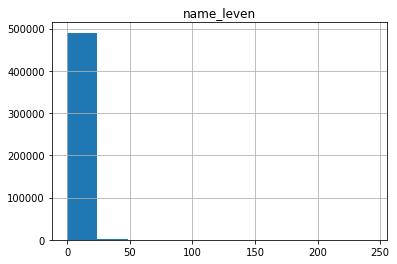

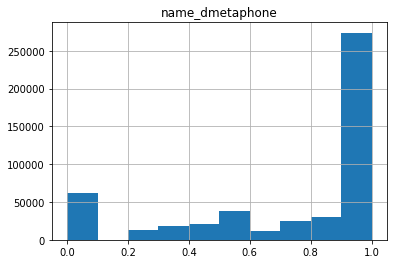

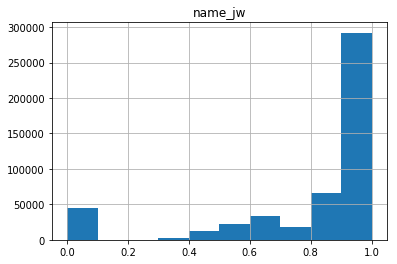

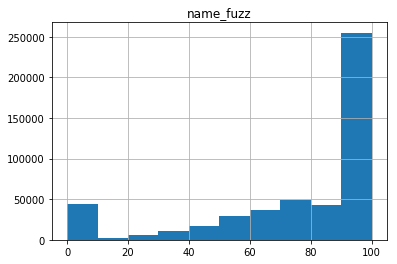

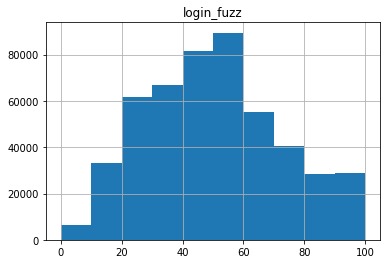

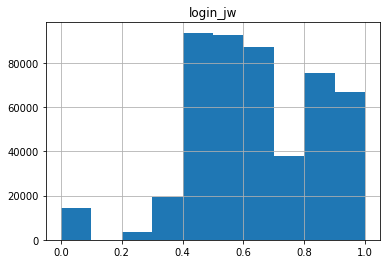

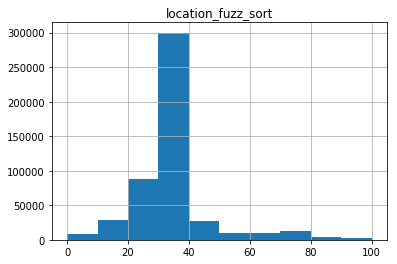

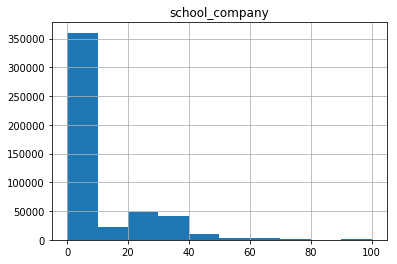

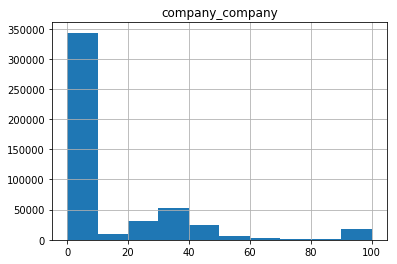

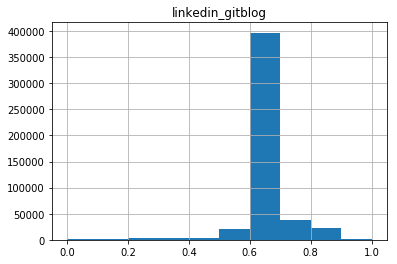

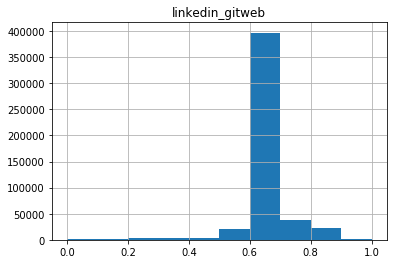

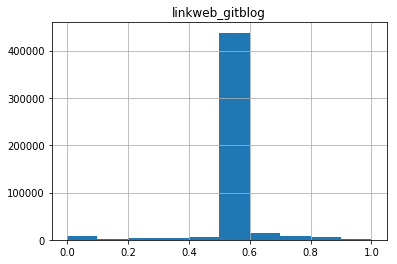

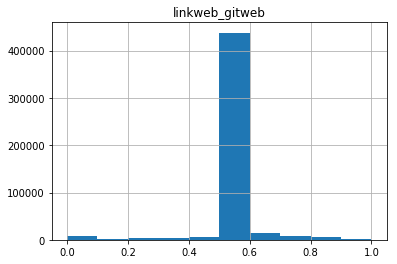

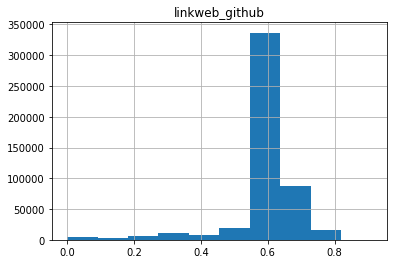

In [15]:
for col in train.columns[3:]:
    print(train[[col]].hist())

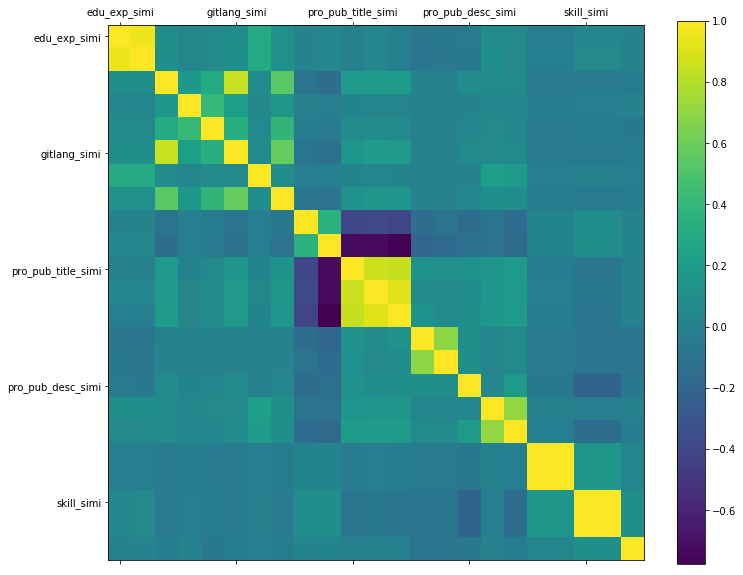

In [16]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(train.iloc[:,3:].corr(), interpolation='nearest')
fig.colorbar(cax)
alpha = train.columns[3:]
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [15]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [132]:
train_data = train.values

test_data = test.values

In [133]:
#X_train, X_val, Y_train, Y_val = train_test_split(train_data[:,3:], train_data[:,2], test_size=0.1)

In [134]:
# split into input and output variables
X_train = train_data[:, 3:]
X_test = test_data[:, 3:]
Y_train = train_data[:,2]
Y_test = test_data[:,2]

In [135]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y_train = encoder.transform(Y_train)
encoder.fit(Y_test)
encoded_Y_test = encoder.transform(Y_test)

In [136]:
X_train.shape[0]

491790

### A. Neural Network: Model 1

In [137]:
from keras.layers import Dropout,BatchNormalization, Bidirectional,LSTM

model = Sequential()
model.add(Dense(256, input_dim = 23,kernel_initializer = "uniform", activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,kernel_initializer = "normal", activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               6144      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 72,193
Trainable params: 72,193
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Early stopping callback
# early stopping tells the model to stop thw training when it doesn't see any performance improvement for a user-defined 
# time-frame (the number of epoch with the PATIENCE parameter)

from keras.callbacks import EarlyStopping
PATIENCE = 10
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=PATIENCE, verbose=1, mode='auto')

In [140]:
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics =['accuracy'])

In [143]:
model.fit(X_train, Y_train,validation_split = 0.10,epochs = 100, batch_size = 128, callbacks = [early_stopping])

Train on 442611 samples, validate on 49179 samples
Epoch 1/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0532 - acc: 0.9825 - val_loss: 0.7886 - val_acc: 0.7033
Epoch 2/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0529 - acc: 0.9826 - val_loss: 0.7558 - val_acc: 0.7434
Epoch 3/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0530 - acc: 0.9825 - val_loss: 0.7377 - val_acc: 0.7399
Epoch 4/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0529 - acc: 0.9825 - val_loss: 0.6720 - val_acc: 0.7728
Epoch 5/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0532 - acc: 0.9826 - val_loss: 0.8686 - val_acc: 0.6688
Epoch 6/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0529 - acc: 0.9824 - val_loss: 0.7610 - val_acc: 0.7386
Epoch 7/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0529 - acc: 0.9826 - val_

Epoch 59/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0521 - acc: 0.9832 - val_loss: 0.9738 - val_acc: 0.6476
Epoch 60/100
442611/442611 [==============================] - 9s 21us/step - loss: 0.0520 - acc: 0.9831 - val_loss: 0.7836 - val_acc: 0.7297
Epoch 00060: early stopping


In [30]:
test_loss, test_accu = model.evaluate(X_test, Y_test, batch_size=128)

210275/210275 [==============================] - 1s 5us/step


In [31]:
print('test_accu:', test_accu)
print('test_loss:', test_loss)

test_accu: 0.9677184639194182
test_loss: 0.098398263358357


In [32]:
import numpy as np

Y_predict = np.round(model.predict(X_test),0).transpose()

Y_predict = pd.Series(Y_predict.flatten()).map(lambda x: int(x))

df_result = pd.concat([pd.Series(encoded_Y_test), Y_predict], axis=1)

df_result.columns = ['Actual','Prediction']

print(pd.crosstab(df_result.Prediction, df_result.Actual))

from sklearn.metrics import accuracy_score, f1_score

# Report the accuracy
f1 = f1_score(encoded_Y_test,Y_predict)
print("F1 Score: " + str(f1))

Actual           0      1
Prediction               
0           178420   3499
1             3289  25067
F1 Score: 0.8807490952531536


## Case2: using raw text data in github repos and linkedin and some of features

### A. Some preliminary experiment

In [16]:
import pandas as pd

In [17]:
data_ori = pd.read_csv('/home/yiwei/yiwei_data/featureNN.csv', index_col = 0)

In [18]:
data_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702065 entries, 0 to 702064
Data columns (total 25 columns):
idGit                 702065 non-null object
idLink                702065 non-null int64
match                 702065 non-null int64
bio_simi              702065 non-null float64
edu_exp_simi          702065 non-null float64
summary_simi          702065 non-null float64
count                 702065 non-null int64
name_leven            702065 non-null int64
name_dmetaphone       702065 non-null float64
name_jw               702065 non-null float64
name_fuzz             702065 non-null int64
login_fuzz            702065 non-null int64
login_jw              702065 non-null float64
location_fuzz_sort    388118 non-null float64
school_company        702065 non-null int64
company_company       702065 non-null int64
org_company           702065 non-null int64
org_school            702065 non-null int64
linkedin_gitblog      200620 non-null float64
linkedin_gitweb       200620 non-nul

In [19]:
data_ori.head(2)

,idGit,idLink,match,bio_simi,edu_exp_simi,summary_simi,count,name_leven,name_dmetaphone,name_jw,...,company_company,org_company,org_school,linkedin_gitblog,linkedin_gitweb,linkweb_gitblog,linkweb_gitweb,linkweb_github,repoText,linkText
0,g830507,100140,1,0.126368,0.148137,-1.0,1,0,1.0,1.0,...,100,0,0,0.607843,0.607843,NaN,NaN,NaN,"devise_security_extension,react,dns.js.org,red...",",,,,,Java,C++,PHP,Social Media,JavaScript,Prog..."
1,g980367,100227,0,-1.000000,-1.000000,-1.0,21,0,1.0,1.0,...,39,0,0,0.641026,0.641026,NaN,NaN,NaN,"oooh-la-la,sketchup-samples,wagtail,django-cac...",",,MissionHub makes it easy for leaders to impr..."


In [20]:
import numpy as np

In [23]:
# examine which columns have NaN values

for col in data_ori.columns[3:-2]:
    print(col+":", sum(np.isnan(data_ori[col])))  

bio_simi: 0
edu_exp_simi: 0
summary_simi: 0
count: 0
name_leven: 0
name_dmetaphone: 0
name_jw: 0
name_fuzz: 0
login_fuzz: 0
login_jw: 0
location_fuzz_sort: 0
school_company: 0
company_company: 0
org_company: 0
org_school: 0
linkedin_gitblog: 0
linkedin_gitweb: 0
linkweb_gitblog: 0
linkweb_gitweb: 0
linkweb_github: 0


#### A1. Fill the NaN values in the data

In [22]:
# fill the NaN values with the averages of the columns 
data_ori = data_ori.fillna(data_ori.loc[:,'bio_simi':'linkweb_github'].mean())

#### A2. Merge the repoText and linkText to build the vocabulary

In [24]:
# merge the repoText and linkText to create the raw text for the tokenizer
data_ori['text'] = data_ori['repoText'].str.cat(data_ori[['linkText']], sep=',')

In [25]:
data_ori.shape[0]

702065

In [26]:
# use NLTK library to split the text with regular expression 
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[\'\\w\#\@++\d]+')
result = []
for i in range(0, data_ori.shape[0]):
    result.append(tokenizer.tokenize(data_ori.loc[i, 'text']))

[nltk_data] Downloading package stopwords to /home/jia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data_ori['token'] = result 

#### A2. Remove the stop words in the vocabulary 

In [28]:
# remove stop words from the list 
from nltk.corpus import stopwords
stop = stopwords.words('english')
resultSWR =[]
for i in range(0, data_ori.shape[0]):
    temp = [j for j in data_ori.loc[i,'token'] if j not in stop]
    resultSWR.append(temp)

In [29]:
#for i in range(0, len(resultSWR)-1):
#  print(len(resultSWR[i]))

In [30]:
data_ori['SWRemoved'] = resultSWR

In [31]:
from keras.preprocessing.text import Tokenizer
tokenizerKeras= Tokenizer(num_words= 2500000, filters='_,-', lower=True, split=' ', char_level=False, oov_token=None)

In [32]:
tokenizerKeras.fit_on_texts(data_ori.loc[:,'SWRemoved'])

In [33]:
# to recover the word index from that was computed
word_index = tokenizerKeras.word_index
print("Found %s unique tokens."% len(word_index))

Found 2248852 unique tokens.


In [34]:
repoIndex = tokenizerKeras.texts_to_sequences(data_ori['repoText'])

In [35]:
temp =[]
for i in range(0,len(repoIndex)):
    temp.append(len(repoIndex[i]))

In [51]:
temp_df = np.array(temp)

(array([4.57517e+05, 8.71830e+04, 1.07810e+05, 1.72000e+04, 9.96000e+03,
        6.66000e+03, 5.31600e+03, 4.30500e+03, 3.12200e+03, 1.61100e+03,
        1.32000e+03, 1.60000e+01, 2.00000e+00, 3.00000e+00, 3.00000e+00]),
 array([   0,   50,  100,  300,  400,  500,  600,  700,  800,  900, 1000,
        1500, 1700, 1800, 1900, 2000]),
 <a list of 15 Patch objects>)

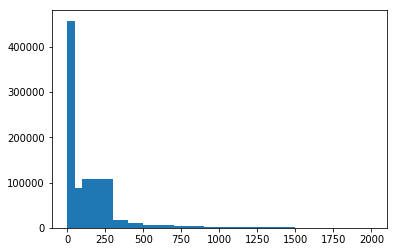

In [52]:
plt.hist(temp_df, bins = [0,50,100, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 1700, 1800, 1900, 2000])

In [36]:
linkIndex= tokenizerKeras.texts_to_sequences(data_ori['linkText'])

In [54]:
tempLink =[]
for i in range(0,len(linkIndex)):
    tempLink.append(len(linkIndex[i])) 

In [55]:
tempLink_df = np.array(tempLink)

(array([2.25049e+05, 1.03691e+05, 2.45076e+05, 5.37150e+04, 3.00130e+04,
        1.70720e+04, 1.07610e+04, 5.97400e+03, 3.70600e+03, 2.34800e+03,
        3.30700e+03, 3.96000e+02, 1.03000e+02, 5.40000e+01, 1.29000e+02]),
 array([   0,   50,  100,  300,  400,  500,  600,  700,  800,  900, 1000,
        1500, 1700, 1800, 1900, 2000]),
 <a list of 15 Patch objects>)

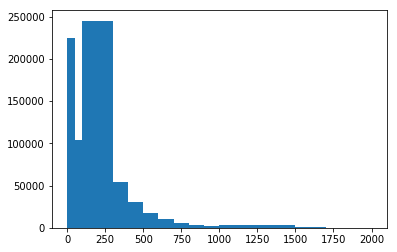

In [56]:
plt.hist(tempLink_df, bins = [0,50,100, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 1700, 1800, 1900, 2000])

In [37]:
data_ori['repoIndex'] = repoIndex

In [38]:
data_ori['linkIndex'] = linkIndex

In [59]:
data_ori.to_csv('/home/jia/Dropbox/Startup/code/Talentful/data/dataSWR0925.csv')

#### A3. Split the data_ori into training and test data sets based on the ID's from Spark

In [62]:
trainKeras.columns

Index(['idGit', 'idLink', 'match', 'bio_simi', 'edu_exp_simi', 'summary_simi',
       'count', 'name_leven', 'name_dmetaphone', 'name_jw', 'name_fuzz',
       'login_fuzz', 'login_jw', 'location_fuzz_sort', 'school_company',
       'company_company', 'org_company', 'org_school', 'linkedin_gitblog',
       'linkedin_gitweb', 'linkweb_gitblog', 'linkweb_gitweb',
       'linkweb_github', 'repoText', 'linkText', 'text', 'token', 'SWRemoved',
       'repoIndex', 'linkIndex'],
      dtype='object')

In [41]:
trainKeras= pd.merge(data_ori,trainingID)

In [42]:
testKeras = pd.merge(data_ori, testID)

In [43]:
from keras.preprocessing.sequence import pad_sequences

repoTrain = pad_sequences(trainKeras.loc[:,'repoIndex'], maxlen=1800, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [44]:
repoTest = pad_sequences(testKeras.loc[:,'repoIndex'], maxlen=1800, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [45]:
linkTrain = pad_sequences(trainKeras.loc[:,'linkIndex'], maxlen=1800, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [46]:
linkTest = pad_sequences(testKeras.loc[:,'linkIndex'], maxlen=1800, dtype='int32', padding='pre', truncating='pre', value=0.0)

#### A3. Build the model

In [47]:
labels = trainKeras['match']

In [48]:
label_test = testKeras['match']

In [49]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels= encoder.transform(labels)

In [50]:
encoder.fit(label_test)
encoded_Ltest= encoder.transform(label_test)

In [51]:
import keras
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

repo_text = Input(shape=(1800,), dtype = 'int32')
link_text = Input(shape=(1800,), dtype = 'int32')

In [52]:
# This layer can take as input a matrix
# and will return a matrix of size (1800,64)
shared_embed = Embedding(output_dim=64, input_dim=2248852, input_length=1800)

In [53]:
repo_embed = shared_embed(repo_text)
link_embed = shared_embed(link_text)

In [54]:
shared_lstm = LSTM(32)

In [55]:
repo_encoded = shared_lstm(repo_embed)
link_encoded = shared_lstm(link_embed)

In [56]:
merged_vector = keras.layers.concatenate([repo_encoded, link_encoded], axis=-1)

In [57]:
main_input = Input(shape= (20,), name = 'main_input')

In [58]:
#aux_1 = Dense(64, activation = 'relu')(main_input)
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(main_input)

In [59]:
#auxiliary_input = Input(shape=(20,), name='aux_input')

In [60]:
x = keras.layers.concatenate([main_input,merged_vector])

In [61]:
# We stack a deep densely-connected network on top
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [62]:
model = Model(inputs=[main_input, repo_text, link_text], outputs=[main_output, auxiliary_output])

In [63]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',loss_weights=[1., 0.2], metrics = ['accuracy'])

In [64]:
history2 = model.fit([trainKeras.loc[:,'bio_simi':'linkweb_github'][50000:], repoTrain[50000:], linkTrain[50000:]], [labels[50000:], labels[50000:]],
          epochs=8, batch_size=512, validation_data = ([trainKeras.loc[:,'bio_simi':'linkweb_github'][0:50000], repoTrain[0:50000], linkTrain[0:50000]],[labels[0:50000], labels[0:50000]] ))

/home/jia/.local/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 143926528 elements. This may consume a large amount of memory.
  num_elements)


Train on 441790 samples, validate on 50000 samples
Epoch 1/8
441790/441790 [==============================] - 2155s 5ms/step - loss: 0.3314 - main_output_loss: 0.1390 - aux_output_loss: 0.9616 - main_output_acc: 0.9504 - aux_output_acc: 0.8543 - val_loss: 0.1490 - val_main_output_loss: 0.1133 - val_aux_output_loss: 0.1781 - val_main_output_acc: 0.9617 - val_aux_output_acc: 0.9386
Epoch 2/8
441790/441790 [==============================] - 2154s 5ms/step - loss: 0.1426 - main_output_loss: 0.1075 - aux_output_loss: 0.1752 - main_output_acc: 0.9631 - aux_output_acc: 0.9404 - val_loss: 0.1377 - val_main_output_loss: 0.1028 - val_aux_output_loss: 0.1746 - val_main_output_acc: 0.9646 - val_aux_output_acc: 0.9376
Epoch 3/8
441790/441790 [==============================] - 2158s 5ms/step - loss: 0.1359 - main_output_loss: 0.1015 - aux_output_loss: 0.1716 - main_output_acc: 0.9654 - aux_output_acc: 0.9415 - val_loss: 0.1402 - val_main_output_loss: 0.1059 - val_aux_output_loss: 0.1714 - val_main_o

In [122]:
from keras.models import load_model

model.save('modelGit_link.h5') 

In [64]:
history1.history

{'aux_output_acc': [0.9446572724091434, 0.9546412086588139],
 'aux_output_loss': [0.15482816229664506, 0.13223825295039],
 'loss': [0.17166872106569936, 0.13303028470034298],
 'main_output_acc': [0.9506293336547971, 0.9629903007289088],
 'main_output_loss': [0.1407030883882357, 0.10658263359288904]}

In [65]:
test_eval1 = model.evaluate([testKeras.loc[:,'bio_simi':'linkweb_github'], repoTest, linkTest],[encoded_Ltest,encoded_Ltest], batch_size=512)

210275/210275 [==============================] - 252s 1ms/step


In [65]:
test_eval= model.evaluate([testKeras.loc[:,'bio_simi':'linkweb_github'], repoTest, linkTest],[encoded_Ltest,encoded_Ltest], batch_size=512)

210275/210275 [==============================] - 249s 1ms/step


In [67]:
test_eval

[0.13913644302870684,
 0.10641784045238045,
 0.16359300892739415,
 0.9636190702812862,
 0.9437688740965671]

In [68]:
import numpy as np

Y_predict = np.round(model.predict([testKeras.loc[:,'bio_simi':'linkweb_github'],repoTest, linkTest], batch_size= 512),0).transpose()

In [69]:
Y_predict[:,:,0]

array([[0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [70]:
Y_predict0 = pd.Series(Y_predict[:,:,0].flatten()).map(lambda x: int(x))

In [71]:
Y_predict1 = pd.Series(Y_predict[:,:,1].flatten()).map(lambda x: int(x))

In [72]:
df_result = pd.concat([pd.Series(encoded_Ltest), Y_predict0], axis=1)

df_result.columns = ['Actual','Prediction']

print(pd.crosstab(df_result.Prediction, df_result.Actual))

Actual           0      1
Prediction               
0           177743   3684
1             3966  24882


In [73]:
from sklearn.metrics import accuracy_score, f1_score

# Report the accuracy
f1 = f1_score(encoded_Ltest,Y_predict0)
print("F1 Score: " + str(f1))

F1 Score: 0.8667572369108579


In [85]:
import keras
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

repo_textre = Input(shape=(1800,), dtype = 'int32')
link_textre = Input(shape=(1800,), dtype = 'int32')

In [86]:
shared_embedre = Embedding(output_dim=64, input_dim=2248852, input_length=1800)

In [87]:
repo_embedre = shared_embedre(repo_textre)
link_embedre = shared_embedre(link_textre)

In [88]:
shared_lstmre = LSTM(32)

In [89]:
repo_encodedre= shared_lstmre(repo_embedre)
link_encodedre = shared_lstmre(link_embedre)

In [90]:
merged_vectorre = keras.layers.concatenate([repo_encodedre, link_encodedre], axis=-1)

In [91]:
auxiliary_outputre = Dense(1, activation='sigmoid', name='aux_output')(merged_vectorre)

In [92]:
main_inputre = Input(shape= (20,), name = 'main_input')

In [93]:
xre= keras.layers.concatenate([main_inputre,merged_vectorre])

In [94]:
# We stack a deep densely-connected network on top
xre = Dense(256, activation='relu')(xre)
xre = Dense(64, activation='relu')(xre)
xre = Dense(64, activation='relu')(xre)
xre = Dense(64, activation='relu')(xre)

# And finally we add the main logistic regression layer
main_outputre = Dense(1, activation='sigmoid', name='main_outputre')(xre)

In [95]:
modelre = Model(inputs=[main_inputre, repo_textre, link_textre], outputs=[main_outputre, auxiliary_outputre])

In [96]:
modelre.compile(optimizer='rmsprop', loss='binary_crossentropy',loss_weights=[1., 0.2], metrics = ['accuracy'])

In [97]:
historyre= modelre.fit([trainKeras.loc[:,'bio_simi':'linkweb_github'][50000:], repoTrain[50000:], linkTrain[50000:]], [labels[50000:], labels[50000:]],
          epochs=8, batch_size=512, validation_data = ([trainKeras.loc[:,'bio_simi':'linkweb_github'][0:50000], repoTrain[0:50000], linkTrain[0:50000]],[labels[0:50000], labels[0:50000]] ))

/home/jia/.local/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 143926528 elements. This may consume a large amount of memory.
  num_elements)


Train on 441790 samples, validate on 50000 samples
Epoch 1/8
441790/441790 [==============================] - 2450s 6ms/step - loss: 0.2054 - main_outputre_loss: 0.1386 - aux_output_loss: 0.3342 - main_outputre_acc: 0.9503 - aux_output_acc: 0.8701 - val_loss: 0.2020 - val_main_outputre_loss: 0.1341 - val_aux_output_loss: 0.3394 - val_main_outputre_acc: 0.9454 - val_aux_output_acc: 0.8652
Epoch 2/8
441790/441790 [==============================] - 2446s 6ms/step - loss: 0.1684 - main_outputre_loss: 0.1085 - aux_output_loss: 0.2994 - main_outputre_acc: 0.9628 - aux_output_acc: 0.8779 - val_loss: 0.1736 - val_main_outputre_loss: 0.1022 - val_aux_output_loss: 0.3571 - val_main_outputre_acc: 0.9637 - val_aux_output_acc: 0.8555
Epoch 3/8
441790/441790 [==============================] - 2461s 6ms/step - loss: 0.1577 - main_outputre_loss: 0.1023 - aux_output_loss: 0.2774 - main_outputre_acc: 0.9650 - aux_output_acc: 0.8850 - val_loss: 0.1732 - val_main_outputre_loss: 0.0997 - val_aux_output_los

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [100]:
rev = historyre.history

In [103]:
rev.keys()

dict_keys(['main_outputre_loss', 'main_outputre_acc', 'val_aux_output_acc', 'aux_output_loss', 'val_main_outputre_loss', 'aux_output_acc', 'val_aux_output_loss', 'val_loss', 'loss', 'val_main_outputre_acc'])

In [104]:
main_loss = rev['main_outputre_loss']

In [105]:
val_mloss = rev['val_main_outputre_loss']

In [106]:
main_accu = rev['main_outputre_acc']

In [107]:
val_accu = rev['val_main_outputre_acc']

In [110]:
epochs = range(0, len(main_loss))

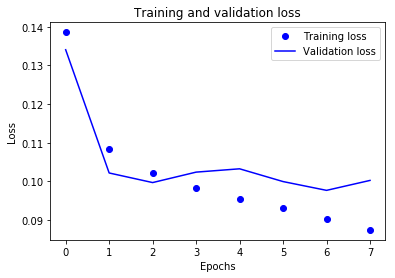

In [114]:
plt.plot(epochs, main_loss, 'bo', label ='Training loss')
plt.plot(epochs, val_mloss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

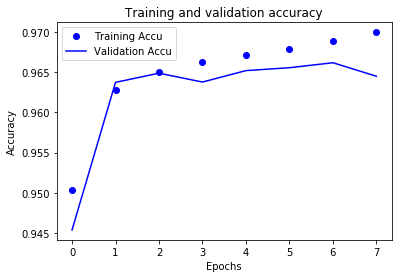

In [115]:
plt.clf
plt.plot(epochs, main_accu, 'bo', label ='Training Accu')
plt.plot(epochs, val_accu, 'b', label = 'Validation Accu')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
test_evalre = modelre.evaluate([testKeras.loc[:,'bio_simi':'linkweb_github'], repoTest, linkTest],[encoded_Ltest,encoded_Ltest], batch_size=512)

210275/210275 [==============================] - 246s 1ms/step


In [117]:
test_evalre

[0.1617156890264633,
 0.1029892209837318,
 0.2936323365449707,
 0.964346688852173,
 0.8795624777139998]

In [118]:
import numpy as np

Yre_predict = np.round(modelre.predict([testKeras.loc[:,'bio_simi':'linkweb_github'],repoTest, linkTest], batch_size= 512),0).transpose()
Yre_predict0 = pd.Series(Y_predict[:,:,0].flatten()).map(lambda x: int(x))

In [119]:
dfre_result = pd.concat([pd.Series(encoded_Ltest), Yre_predict0], axis=1)

dfre_result.columns = ['Actual','Prediction']

print(pd.crosstab(dfre_result.Prediction, dfre_result.Actual))

Actual           0      1
Prediction               
0           177743   3684
1             3966  24882


In [120]:
from sklearn.metrics import accuracy_score, f1_score

# Report the accuracy
f1re = f1_score(encoded_Ltest,Yre_predict0)
print("F1 Score: " + str(f1re))

F1 Score: 0.8667572369108579
